In [43]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Load the data
data = pd.read_csv('fruit_types.csv')
data.head()

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79


In [45]:
# Encode the data
encoder = LabelEncoder()

In [46]:
# Encode the fruit name
data['fruit_name_enc'] = encoder.fit_transform(data['fruit_name'])

# Encode the fruit subtype
data['fruit_subtype_enc'] = encoder.fit_transform(data['fruit_subtype'])


In [47]:
data.head()

,fruit_name,fruit_subtype,mass,width,height,color_score,fruit_name_enc,fruit_subtype_enc
0,apple,granny_smith,192,8.4,7.3,0.55,0,3
1,apple,granny_smith,180,8.0,6.8,0.59,0,3
2,apple,granny_smith,176,7.4,7.2,0.60,0,3
3,mandarin,mandarin,86,6.2,4.7,0.80,2,4
4,mandarin,mandarin,84,6.0,4.6,0.79,2,4


In [48]:
# Splitting the data intood ependant and independent variable
data_to_use = data[['mass', 'width', 'height', 'color_score']]
data_to_target = data['fruit_name_enc']

In [49]:
# Split our dataset

X_train, X_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size = 0.20, random_state = 32)

In [50]:
X_train.shape

(47, 4)

In [51]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)

StandardScaler()

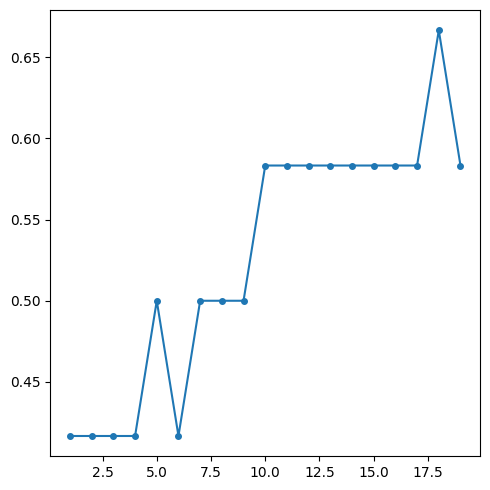

In [52]:
# Getting our k value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))

plt.figure(figsize=(5,5))
plt.plot(range(1, 20), error_rate, marker = 'o', markersize = 4)
plt.tight_layout()



In [53]:
# Building my knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# Make prediction
y_pred_knn = knn.predict(X_test)


In [55]:
# Measure accuracy
metrics.accuracy_score(y_test, y_pred_knn) 

0.5833333333333334

In [56]:
# Creating a decision tree classifier
# gini
decision_tree_gini = DecisionTreeClassifier()

# Using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

# Use a max depth
decision_tree_depth = DecisionTreeClassifier(max_depth=3)


In [57]:
# Fit the trees
decision_tree_gini.fit(X_train, y_train)
# Fitting entropy
decision_tree_ent.fit(X_train, y_train)
# Max depth
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
# Make prediction
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_ent = decision_tree_ent.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)


In [59]:
# measure the accuracy
print("Accuracy (gini)", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy)", metrics.accuracy_score(y_test, y_pred_ent))
print("Accuracy (max depth)", metrics.accuracy_score(y_test, y_pred_depth))

Accuracy (gini) 0.8333333333333334
Accuracy (entropy) 0.8333333333333334
Accuracy (max depth) 0.8333333333333334


In [60]:
# svm
clflinear = svm.SVC(kernel='linear')
clfsigmoid  = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [61]:
# Train the models
clflinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [62]:
# Predict using the trained models
y_pred_lin = clflinear.predict(X_test)
y_pred_sig = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [63]:
# claculate the accuracy of the svm model
print("Accuracy for linear kernel:", metrics.accuracy_score(y_test, y_pred_lin))
print("Accuracy for sigmoid kernel:", metrics.accuracy_score(y_test, y_pred_sig))
print("Accuracy for rbf kernel:", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy for linear kernel: 0.8333333333333334
Accuracy for sigmoid kernel: 0.08333333333333333
Accuracy for rbf kernel: 0.25
